# Cryptocurrency Portfolio Analysis

## Notebook Initialization and Configuration

### Add Imports

In [274]:
import pandas as pd
from pathlib import Path
from pycoingecko import CoinGeckoAPI
from datetime import datetime, date
from MCForecastTools import MCSimulation
import numpy as np


### Add Configuration

In [315]:
TICKERS = ['BTC', 'ETH', 'BNB', 'DASH', 'LTC']
CG_TICKER_IDS = ['binancecoin', 'bitcoin', 'ethereum','litecoin', 'solana']
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 500
TIMEFRAME = '1D'
START_DATE_ET = '2018-11-04'
END_DATE_ET = '2021-11-04'
EXAMPLE_INVESTMENT = 10000

## Retrieve, Prepare, and Store Data

### Identify CoinGecko IDs

In [277]:
cg = CoinGeckoAPI()

coins = cg.get_coins_list()

for coin in coins:
    for ticker in TICKERS:
        if str.upper(coin['symbol']) == ticker:
            print(coin)
            

{'id': 'binancecoin', 'symbol': 'bnb', 'name': 'Binance Coin'}
{'id': 'binance-peg-litecoin', 'symbol': 'ltc', 'name': 'Binance-Peg Litecoin'}
{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin'}
{'id': 'dash', 'symbol': 'dash', 'name': 'Dash'}
{'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum'}
{'id': 'litecoin', 'symbol': 'ltc', 'name': 'Litecoin'}
{'id': 'oec-binance-coin', 'symbol': 'BNB', 'name': 'OEC Binance Coin'}


In [278]:
# get epoch times
start_date = pd.Timestamp(START_DATE_ET, tz='America/New_York').timestamp()
end_date = pd.Timestamp(END_DATE_ET, tz='America/New_York').timestamp()
print(start_date)
print(end_date)

1541304000.0
1635998400.0


### Retrieve and Examine Data

In [285]:
btc = cg.get_coin_market_chart_range_by_id('bitcoin','usd', start_date, end_date)
eth = cg.get_coin_market_chart_range_by_id('ethereum','usd', start_date, end_date)
bnb = cg.get_coin_market_chart_range_by_id('binancecoin','usd', start_date, end_date)
dash = cg.get_coin_market_chart_range_by_id('dash','usd', start_date, end_date)
ltc = cg.get_coin_market_chart_range_by_id('litecoin','usd', start_date, end_date)

In [286]:
print('Dicionaries in response')
print('=======================')
for category in btc:
    display(category)

print('Prices Dictionary')
print('=================')
display(btc['prices'])

Dicionaries in response


'prices'

'market_caps'

'total_volumes'

Prices Dictionary


[[1541376000000, 6351.061941056285],
 [1541462400000, 6415.443408541094],
 [1541548800000, 6474.847290336688],
 [1541635200000, 6574.801180290013],
 [1541721600000, 6490.454730761757],
 [1541808000000, 6413.78203857173],
 [1541894400000, 6429.898792074219],
 [1541980800000, 6434.2845969255495],
 [1542067200000, 6411.353436205148],
 [1542153600000, 6394.289276264062],
 [1542240000000, 5788.612494046974],
 [1542326400000, 5686.541131058274],
 [1542412800000, 5609.956182334204],
 [1542499200000, 5599.1915956893035],
 [1542585600000, 5638.861481452398],
 [1542672000000, 4889.197859239111],
 [1542758400000, 4450.711454417822],
 [1542844800000, 4613.44841218385],
 [1542931200000, 4307.388731717267],
 [1543017600000, 4376.904946801552],
 [1543104000000, 3895.8368129589876],
 [1543190400000, 4039.836551137432],
 [1543276800000, 3811.9235292664935],
 [1543363200000, 3832.92451590069],
 [1543449600000, 4267.243628990657],
 [1543536000000, 4279.475592548712],
 [1543622400000, 4009.6895798259993],

### Prepare DataFrames by Coin

In [287]:
def create_market_history_df(coingecko_prices, symbol):
    df = pd.DataFrame(data=coingecko_prices['prices'], columns=['timestamp', 'close'])
    df['symbol'] = symbol
    return df

In [288]:
btc_df = create_market_history_df(btc,'BTC')
btc_df

,timestamp,close,symbol
0,1541376000000,6351.061941,BTC
1,1541462400000,6415.443409,BTC
2,1541548800000,6474.847290,BTC
3,1541635200000,6574.801180,BTC
4,1541721600000,6490.454731,BTC
...,...,...,...
1091,1635638400000,61837.257003,BTC
1092,1635724800000,61471.868463,BTC
1093,1635811200000,61121.831201,BTC
1094,1635897600000,63247.208961,BTC


In [289]:
eth_df = create_market_history_df(eth,'ETH')
eth_df


,timestamp,close,symbol
0,1541376000000,206.814430,ETH
1,1541462400000,209.108877,ETH
2,1541548800000,219.160887,ETH
3,1541635200000,219.015775,ETH
4,1541721600000,213.407634,ETH
...,...,...,...
1091,1635638400000,4324.609926,ETH
1092,1635724800000,4292.040472,ETH
1093,1635811200000,4330.553152,ETH
1094,1635897600000,4596.593091,ETH


In [290]:
bnb_df = create_market_history_df(bnb,'BNB')
bnb_df

,timestamp,close,symbol
0,1541376000000,9.450966,BNB
1,1541462400000,9.700566,BNB
2,1541548800000,9.806151,BNB
3,1541635200000,9.876521,BNB
4,1541721600000,9.704750,BNB
...,...,...,...
1091,1635638400000,526.943923,BNB
1092,1635724800000,524.704933,BNB
1093,1635811200000,551.288568,BNB
1094,1635897600000,555.342759,BNB


In [291]:
dash_df = create_market_history_df(dash,'DASH')
dash_df

,timestamp,close,symbol
0,1541376000000,162.321853,DASH
1,1541462400000,164.441409,DASH
2,1541548800000,171.012232,DASH
3,1541635200000,167.417424,DASH
4,1541721600000,165.904035,DASH
...,...,...,...
1091,1635638400000,183.352268,DASH
1092,1635724800000,192.492360,DASH
1093,1635811200000,190.391716,DASH
1094,1635897600000,200.976128,DASH


In [292]:
ltc_df = create_market_history_df(ltc,'LTC')
ltc_df

,timestamp,close,symbol
0,1541376000000,53.327371,LTC
1,1541462400000,53.407207,LTC
2,1541548800000,55.828761,LTC
3,1541635200000,54.249268,LTC
4,1541721600000,52.678122,LTC
...,...,...,...
1091,1635638400000,190.194683,LTC
1092,1635724800000,191.987114,LTC
1093,1635811200000,198.151499,LTC
1094,1635897600000,201.133134,LTC


### Prepare Cryptocurrency Portfolio DataFrame

In [295]:
prices_df = pd.concat([btc_df, eth_df, bnb_df, dash_df, ltc_df]) \
    .pivot_table(index="timestamp",columns="symbol")
prices_df = prices_df.swaplevel(axis=1)
prices_df

symbol,BNB,BTC,DASH,ETH,LTC
,close,close,close,close,close
timestamp,,,,,
1541376000000,9.450966,6351.061941,162.321853,206.814430,53.327371
1541462400000,9.700566,6415.443409,164.441409,209.108877,53.407207
1541548800000,9.806151,6474.847290,171.012232,219.160887,55.828761
1541635200000,9.876521,6574.801180,167.417424,219.015775,54.249268
1541721600000,9.704750,6490.454731,165.904035,213.407634,52.678122
...,...,...,...,...,...
1635638400000,526.943923,61837.257003,183.352268,4324.609926,190.194683
1635724800000,524.704933,61471.868463,192.492360,4292.040472,191.987114


### Store Raw Data

In [296]:
prices_df.to_csv(Path('../data/crypto_raw.csv'))

### Clean and Store Data

In [298]:
#Check for non-float data types and missing data
display(prices_df.dtypes)
display(prices_df.isnull().sum())

prices_df = prices_df.dropna()
display(prices_df.isnull().sum())

prices_df.to_csv(Path('../data/crypto_clean.csv'))

symbol       
BNB     close    float64
BTC     close    float64
DASH    close    float64
ETH     close    float64
LTC     close    float64
dtype: object

symbol       
BNB     close    0
BTC     close    0
DASH    close    0
ETH     close    0
LTC     close    0
dtype: int64

symbol       
BNB     close    0
BTC     close    0
DASH    close    0
ETH     close    0
LTC     close    0
dtype: int64

## Analyze Data

### Calculate Daily Returns (aggregated)

In [300]:
closing_prices_df = prices_df.xs('close',axis='columns',level=1)

daily_returns_df = closing_prices_df.sum(axis=1).pct_change().dropna()

print('DAILY RETURNS')
print('=============')
daily_returns_df

DAILY RETURNS


timestamp
1541462400000    0.010191
1541548800000    0.011464
1541635200000    0.013665
1541721600000   -0.013268
1541808000000   -0.012309
                   ...   
1635638400000   -0.008247
1635724800000   -0.005805
1635811200000   -0.004213
1635897600000    0.036285
1635984000000   -0.001230
Length: 1095, dtype: float64

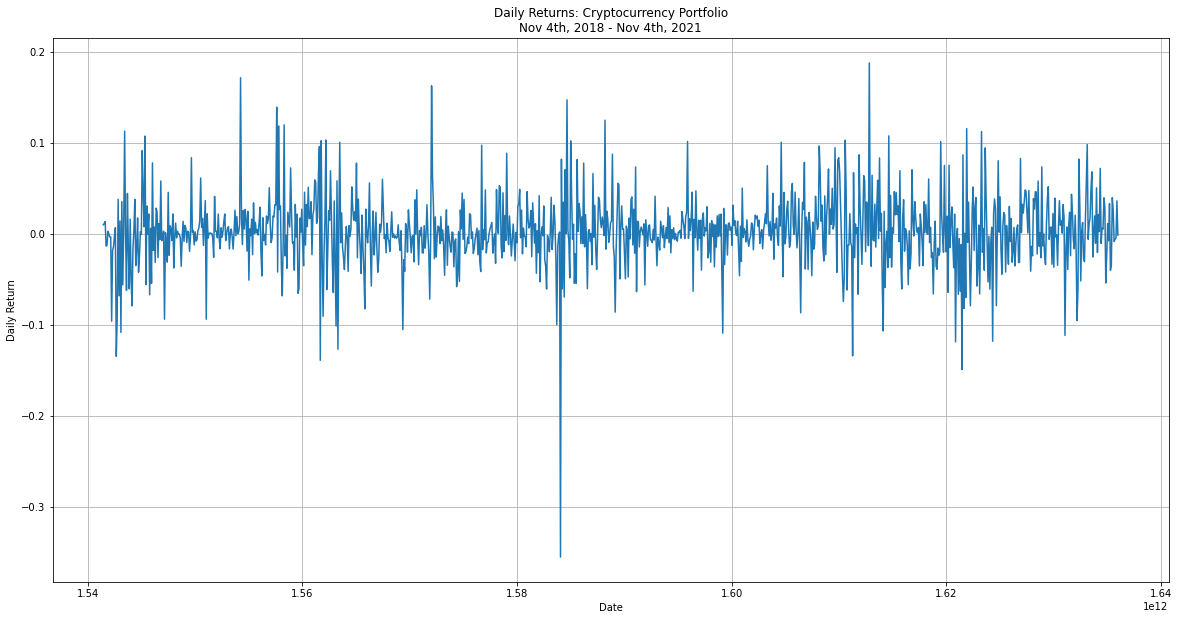

In [301]:
plot = daily_returns_df.plot(title='Daily Returns: Cryptocurrency Portfolio\n'
                            'Nov 4th, 2018 - Nov 4th, 2021',
                            figsize=(20,10))
plot.set (xlabel='Date', ylabel='Daily Return')
plot.grid()

### Calculate Cumulative Return

In [325]:
cumulative_returns_df = (1 + daily_returns_df).cumprod() - 1

print('CUMULATIVE RETURNS')
print('==================')
cumulative_returns_df

CUMULATIVE RETURNS


timestamp
1541462400000    0.010191
1541548800000    0.021772
1541635200000    0.035734
1541721600000    0.021992
1541808000000    0.009413
                   ...   
1635638400000    8.886863
1635724800000    8.829474
1635811200000    8.788065
1635897600000    9.143225
1635984000000    9.130750
Length: 1095, dtype: float64

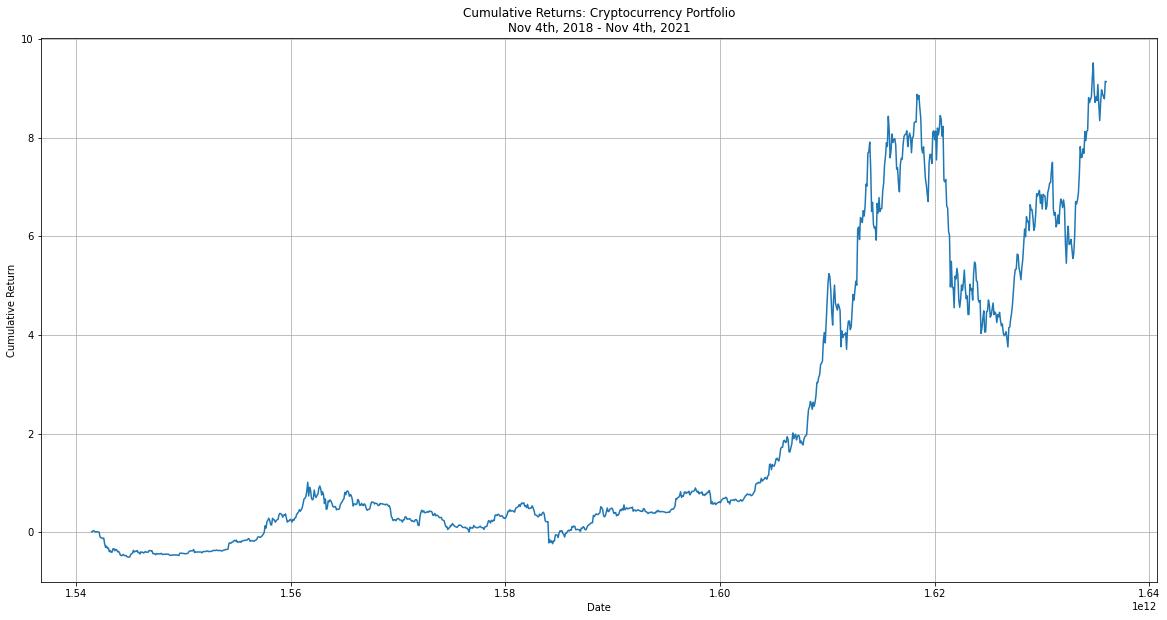

In [328]:
plot = cumulative_returns_df.plot(title='Cumulative Returns: Cryptocurrency Portfolio\n'
                                'Nov 4th, 2018 - Nov 4th, 2021',
                                figsize=(20,10))
plot.set (xlabel='Date', ylabel='Cumulative Return')
plot.grid()

### Analyze the Volatility

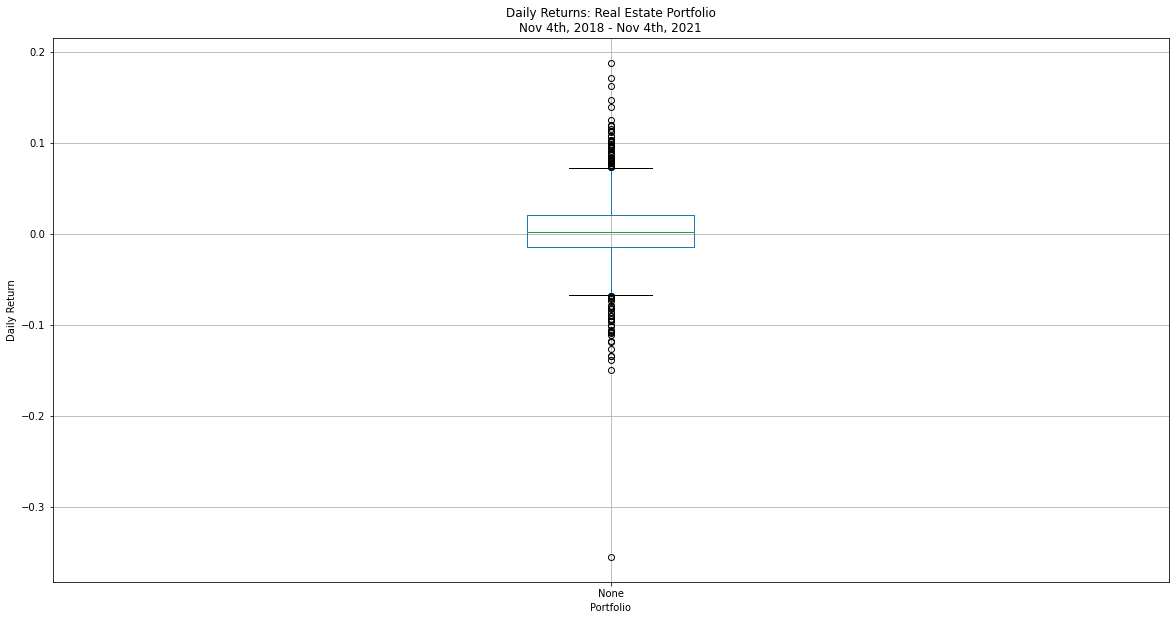

In [304]:
plot = daily_returns_df.plot(kind='box',
                        title='Daily Returns: Real Estate Portfolio\n'
                        'Nov 4th, 2018 - Nov 4th, 2021',
                        figsize=(20,10))
plot.set (xlabel='Portfolio', ylabel='Daily Return')
plot.grid()

### Analyze the Risk

In [305]:
daily_returns_std_df = daily_returns_df.std()
print('DAILY RETURNS STANDARD DEVIATION')
print('================================')
daily_returns_std_df

DAILY RETURNS STANDARD DEVIATION


0.039288184363267066

In [306]:
daily_returns_annualized_std_df = daily_returns_df.std() * np.sqrt(NUM_TRADING_DAYS)
print('ANNUALIZED STANDARD DEVIATION')
print('=============================')
daily_returns_annualized_std_df

ANNUALIZED STANDARD DEVIATION


0.6236805917307672

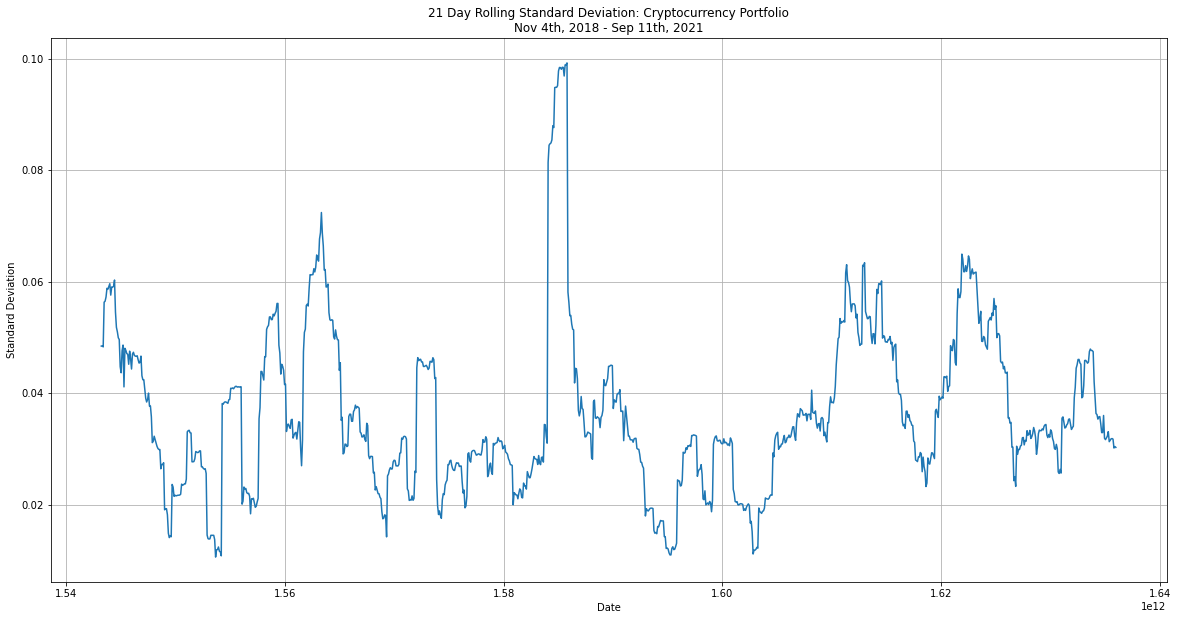

In [307]:
daily_returns_std_21_df = daily_returns_df.rolling(window=21).std()
plot = daily_returns_std_21_df.plot(title='21 Day Rolling Standard Deviation: Cryptocurrency Portfolio\n'
                                        'Nov 4th, 2018 - Sep 11th, 2021',
                                        figsize=(20,10))
plot.set (xlabel='Date', ylabel='Standard Deviation')
plot.grid()

### Analyze the Risk-Return Profile

In [308]:
average_annual_return_df = daily_returns_df.mean() * NUM_TRADING_DAYS
print("AVERAGE ANNUAL RETURN")
print("=====================")
average_annual_return_df

AVERAGE ANNUAL RETURN


0.7315504643433146

In [309]:
sharpe_ratio = average_annual_return_df / daily_returns_annualized_std_df
print("SHARPE RATIO")
print("=============")
sharpe_ratio

SHARPE RATIO


1.1729569174394208

### Run 10 Year Monte Carlo Simulation

In [311]:
years = 10
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013178,0.999650,1.000818,0.969623,1.044361,1.011959,1.021093,1.001468,0.979501,1.044918,...,0.953066,1.037535,0.984635,0.987399,1.013960,1.021612,1.010690,1.001163,0.972210,1.021452
2,1.002219,1.013108,0.989789,0.950046,1.068945,1.005309,0.984652,0.979806,0.973729,1.046339,...,0.906599,1.031424,1.015187,0.974742,0.954196,1.048232,0.998077,0.993665,0.962943,1.003979
3,1.063459,0.980375,0.955028,0.978189,1.021105,1.009036,1.004831,1.022462,0.948683,1.110700,...,0.893441,0.991183,0.961933,0.997754,0.917749,1.037703,0.987246,1.004768,0.979899,1.044665
4,1.091437,0.993484,0.962612,0.973403,0.978900,0.976068,1.051468,1.007107,0.943431,1.122588,...,0.877147,0.974153,0.969036,0.990771,0.901736,1.016374,1.025063,1.027088,0.943717,1.033116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,689.539056,1326.714830,4134.681145,1344.849764,2560.459584,23252.711214,343.232362,3816.820828,2453.113527,3611.548934,...,1122.323651,2262.310305,8332.547747,53412.890747,3785.208335,11220.274805,229.907216,913.383509,7768.770229,4111.864839
2517,684.257889,1301.407753,4203.165560,1347.902250,2428.864482,23113.263713,349.105259,3929.747621,2491.442401,3576.254139,...,1123.177167,2268.984804,8171.824381,53178.844409,3801.180493,11356.056796,225.869709,941.102159,7648.058691,4099.523230
2518,706.129576,1294.823938,4227.001360,1334.287050,2330.721570,23505.917535,340.086901,3947.813149,2461.412346,3517.561621,...,1101.484319,2319.463508,8054.583781,52124.872884,3872.524932,10908.463549,208.793951,943.886586,7724.128892,4119.158748
2519,729.276318,1307.892440,4361.554985,1372.042594,2320.517411,22615.144473,329.746703,4007.008757,2466.685894,3616.160621,...,1079.168180,2329.556691,8209.296933,51757.720017,3929.000337,10624.867297,208.178398,951.427388,7682.749450,4264.690969


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

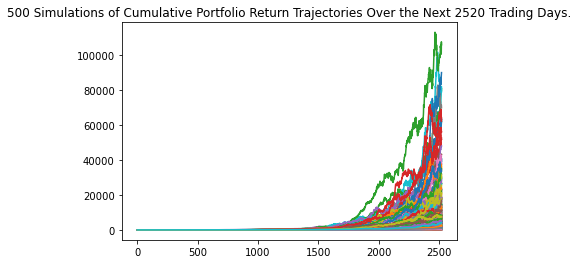

In [312]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

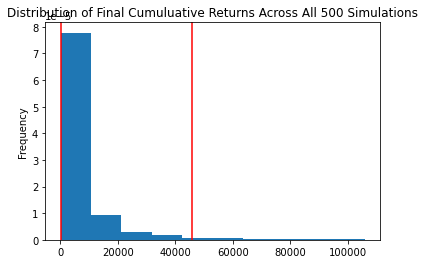

In [313]:
mc.plot_distribution()

### Calculate 10 Year Cumulative Returns

In [314]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Cryptocurrency.')
print(mc_cumulative_returns)

10 year Monte Carlo summary statistics for Cryptocurrency.
count              500.000000
mean              7529.672920
std              12553.903678
min                 70.761908
25%               1448.463648
50%               3343.350145
75%               7413.541103
max             105982.997889
95% CI Lower       329.298656
95% CI Upper     45826.895957
Name: 2520, dtype: float64


In [317]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected return of the "
    f"cryptocurrency portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected return of the real estate portfolio is between  329.30% and  45,826.90%. An initial example investment of $ 10,000.00 would be worth between $ 3,292,986.56 and $ 458,268,959.57 in 10 years


### Run 30 year Monte Carlo Simulation 

In [318]:
years = 30
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.938963e-01,1.004821e+00,1.006161e+00,1.003052e+00,9.633386e-01,1.030008e+00,1.068070e+00,9.738432e-01,1.000177e+00,9.788529e-01,...,1.015349e+00,9.859466e-01,1.026745e+00,9.648730e-01,1.012051e+00,1.007994e+00,9.915034e-01,1.002025e+00,1.072842e+00,9.880628e-01
2,9.996279e-01,9.886276e-01,9.958482e-01,1.047506e+00,9.886312e-01,1.050056e+00,1.020653e+00,9.202893e-01,9.938114e-01,9.871062e-01,...,1.010639e+00,9.403504e-01,1.015957e+00,9.771373e-01,1.034190e+00,9.994559e-01,1.000087e+00,9.991827e-01,1.125865e+00,1.009660e+00
3,1.014668e+00,9.689272e-01,9.766319e-01,1.040809e+00,9.649296e-01,1.002279e+00,1.013836e+00,9.210653e-01,9.926130e-01,9.857046e-01,...,1.036466e+00,9.486062e-01,1.041727e+00,9.813397e-01,1.067552e+00,9.859611e-01,1.023139e+00,9.947866e-01,1.143066e+00,1.026907e+00
4,1.001956e+00,9.628662e-01,1.026949e+00,1.020743e+00,9.613547e-01,9.862694e-01,1.007895e+00,9.648156e-01,1.017008e+00,1.006235e+00,...,1.044619e+00,9.459093e-01,1.047709e+00,1.007072e+00,1.069541e+00,9.536271e-01,1.041909e+00,9.966020e-01,1.171834e+00,1.030155e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.222230e+10,9.768029e+10,4.532798e+09,5.505133e+10,5.565251e+10,1.280937e+10,6.384912e+08,1.483862e+10,1.514812e+10,3.397615e+10,...,3.241465e+10,9.020306e+10,3.878432e+10,9.123347e+10,1.187804e+10,2.068732e+10,2.665802e+11,3.195171e+10,4.395862e+10,1.522730e+09
7557,6.270079e+10,9.787526e+10,4.460582e+09,5.481497e+10,5.673080e+10,1.248655e+10,6.678812e+08,1.451673e+10,1.533061e+10,3.289090e+10,...,3.154626e+10,9.222837e+10,3.915647e+10,9.093253e+10,1.181925e+10,2.143198e+10,2.704569e+11,3.108137e+10,4.341444e+10,1.498433e+09
7558,6.364223e+10,9.855161e+10,4.189185e+09,5.578942e+10,5.541915e+10,1.271637e+10,6.738832e+08,1.431511e+10,1.578243e+10,3.279870e+10,...,3.204027e+10,9.064891e+10,3.987801e+10,9.150989e+10,1.181221e+10,2.160123e+10,2.602566e+11,3.073309e+10,4.589250e+10,1.526273e+09
7559,6.523851e+10,1.006851e+11,4.233547e+09,5.615882e+10,5.604752e+10,1.279150e+10,6.566029e+08,1.445358e+10,1.613900e+10,3.338386e+10,...,3.187107e+10,9.327505e+10,4.088129e+10,9.130924e+10,1.192926e+10,2.159495e+10,2.589044e+11,3.151941e+10,4.607256e+10,1.505700e+09


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

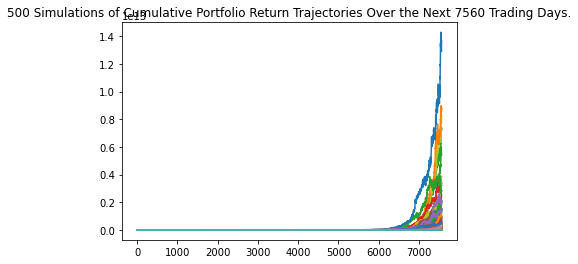

In [319]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

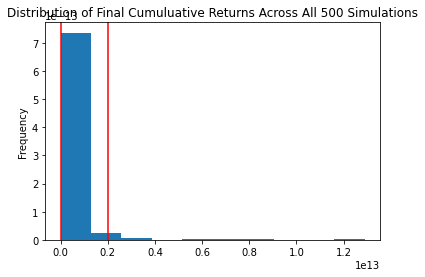

In [320]:
mc.plot_distribution()

### Calculate 30 Year Cumulative Returns

In [322]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Real Estate.')
print(mc_cumulative_returns)

30 year Monte Carlo summary statistics for Real Estate.
count           5.000000e+02
mean            2.688427e+11
std             9.752113e+11
min             1.182925e+08
25%             6.555592e+09
50%             3.010880e+10
75%             1.453968e+11
max             1.289807e+13
95% CI Lower    6.154102e+08
95% CI Upper    2.014665e+12
Name: 7560, dtype: float64


In [324]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected returns of the "
    f"cryptocurrency portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected returns of the cryptocurrency portfolio is between  615,410,154.20% and  2,014,665,479,412.80%. An initial example investment of $ 10,000.00 would be worth between $ 6,154,101,541,987.23 and $ 20,146,654,794,127,984.00 in 30 years
